In [1]:
import random
import time
import importlib
import game
importlib.reload(game)
import gameEnvF 
importlib.reload(gameEnvF)
from game import ColorableCliqueGame
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from gameEnvF import draw, triangle_huristic, alphabetaMaxDepth, alphabetaMove, random_move, getPsuedoLegalStates, getLegalStatesAndTag
print(tf.__version__)

colors = [(255,100,100), (100,100,255)]
env = ColorableCliqueGame(300,300,6,colors)
#env.close()

pygame 2.1.2 (SDL 2.0.18, Python 3.10.4)
Hello from the pygame community. https://www.pygame.org/contribute.html
2.8.0


In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib

loaded_rf = joblib.load("./models/rf_small.joblib")

In [3]:
def huristic_rf(game : ColorableCliqueGame):
    return loaded_rf.predict([game.state1D()])[0]

### Get all possible positions legal and illegal

In [4]:
from game import nCr

allp = getPsuedoLegalStates()
print("size : ", len(allp))

500000
1000000
1500000
2000000
2500000
3000000
3500000
4000000
4500000
5000000
5500000
6000000
6500000
7000000
size :  14348907


### Sort the ilegal positions, and create the tag.

In [5]:
import importlib
import game
importlib.reload(game)
from game import ColorableCliqueGame

env = ColorableCliqueGame(300,300,6,colors)

In [8]:
X = getLegalStatesAndTag(allp, 1, huristic_rf)

# 41 min for BIF RF. and failed to get too 100k

500000


KeyboardInterrupt: 

[ 1  1  1  1 -1  0  0 -1  0  0  0 -1  0 -1 -1 -1] -2.7805781249999995
True
-1.95
-1


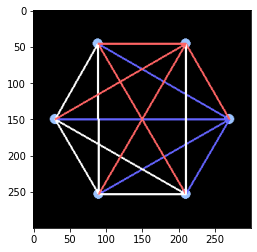

In [ ]:
drawIndex = 43006
env = ColorableCliqueGame(300,300,6,colors)
print(X[drawIndex][0], X[drawIndex][1])
print(env.loadfrom1D(X[drawIndex][0]))
print(alphabetaMaxDepth(env, -9999, 9999, 1, triangle_huristic))
print(env.winner)
draw(env)

# [ 1  1  1  1  1 -1  0 -1  0  0  0 -1  0 -1 -1  1] -97.5
# True
# -97.5
# -1

In [ ]:
# def save(X, name, maxSize):
#     folds = int(X.shape[0] / maxSize)
#     for i in range(folds):
#         sn = name + "_p" + i + ".npy"
#         with open(sn, 'wb') as f:
#             np.save(f, X[i * maxSize: (i+1) * maxSize])
#save(X, "K6D3", 10000)
#import gzip

filename = 'K6D3_rf.npz'
with open(filename, 'wb') as f:
    np.savez_compressed(f, data=X)
    #f.close()
#np.savez_compressed('/tmp/123', a=X)

In [ ]:
with open(filename, 'rb') as f:
    a = np.load(f, allow_pickle=True)
    data = a['data']

In [ ]:
print(data[0])
print(X[0])

[array([ 1,  1,  1,  1,  0,  0,  0,  0, -1,  0,  0, -1, -1, -1, -1, -1],
       dtype=int64)
 -100]
[array([ 1,  1,  1,  1,  0,  0,  0,  0, -1,  0,  0, -1, -1, -1, -1, -1],
       dtype=int64)
 -100]
